In [2]:
import sys
sys.path.append("../")

In [18]:
import scipy
from scipy import special

import delay.calculator as calc
from delay.delay import *
import delay.model as model

import numpy
import pandas

In [21]:
def fA(x):
    return N/2 if  x <= d else 0

def fB(x):
    return 0 if x < -d else N/2

probabilities = np.zeros(N+1, dtype=float)
counts = np.zeros(N+1, dtype=int)
def simulate():
    def nextElem(func):
        term = -N/2 if func == max else N/2
        rc = calculateValue(previousA, previousB)
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA]), fB(x[current - tauB])
        
        counts[index(x[current], N)] += 1
        if previousB < -d:
            pass
        elif previousA <= d:
            probabilities[index(x[current], N)] += 0.5
        else:
            probabilities[index(x[current], N)] += 1.0
            
        prob = calculateProbability(previousA - previousB)
        r = random.random()
        if r <= prob:
            nextElement = nextElem(min) # +1
        else:
            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

In [22]:
N = 100
tauA = 20
tauB = 0
d=20
m = max(tauA, tauB)
x = [0] * m + [1] 
duration = 1000000

calculateProbability = calc.linear(N=100)

simulate()
            


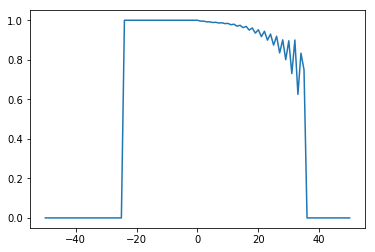

1.0379022898198076


In [30]:
counts = list(map(lambda x : 1 if x==0 else x, counts))
probs = np.array(probabilities) / np.array(counts)
model.plot(probs);
print(probs[70] / probs[71])

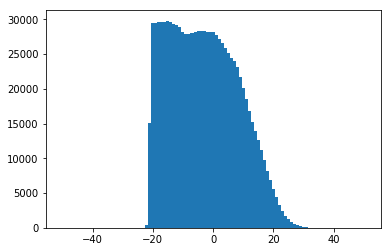

In [26]:
plt.hist(x, bins=np.linspace(-N/2-0.5, N/2+0.5, N+2));